# Loan Application Status Prediction

## Importing Libreries

In [3]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

import warnings
warnings.filterwarnings("ignore")

Importing all neccessory Libreries

## Importing dataset

In [4]:
#Import the dataset

data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Importing the dataset and see all columns with first five rows.

## Shape of data with number of rows and columns

In [5]:
data.shape

(614, 13)

There are 614 Rows and 13 Columns in dataset

## Detailed description

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum value.

# Datatypes of all columns

In [7]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We have Integer data type ----> ApplicantIncome only. 

object datatypes ----> Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area and Loan_Status   

float data type  ----> CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History

all are independent variable accept quality. quality is a target variable.

# Checking is there any null value

In [8]:
#check is there any null value present in any column

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing value in dataset ----> Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History.
As we see null values present, we need to fill that values.

## Visualization of null values

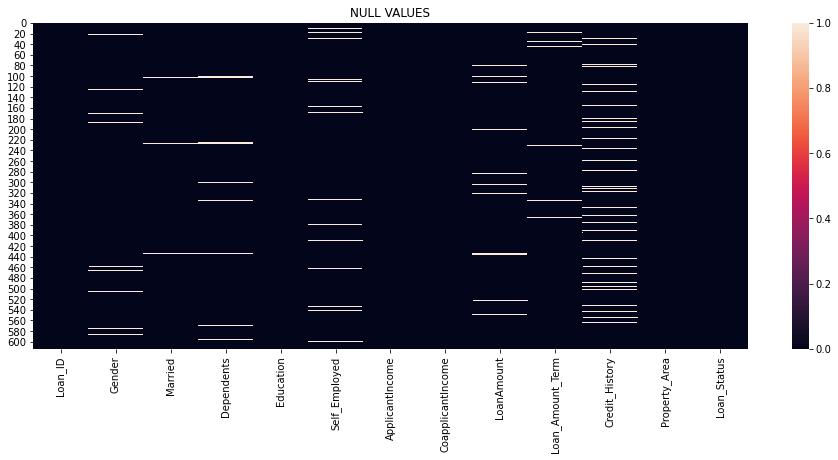

In [9]:
plt.figure(figsize=[16,6])
sn.heatmap(data.isnull())
plt.title("NULL VALUES")
plt.show()

As shown in plot the white line shows Null values in data set.

## Before visualization we need to convert target variable to integer data type

In [10]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [11]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
# Replace Attrition column to binary encoder
data['Loan_Status'] = data['Loan_Status'].replace({'Y':1, 'N':0})

after converting target variable the Y will become 1 and N will become 0.

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)
Uni variate analysis works with only one variable, hence it is called uni variate.

In [13]:
fe = data[["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Loan_Status"]]

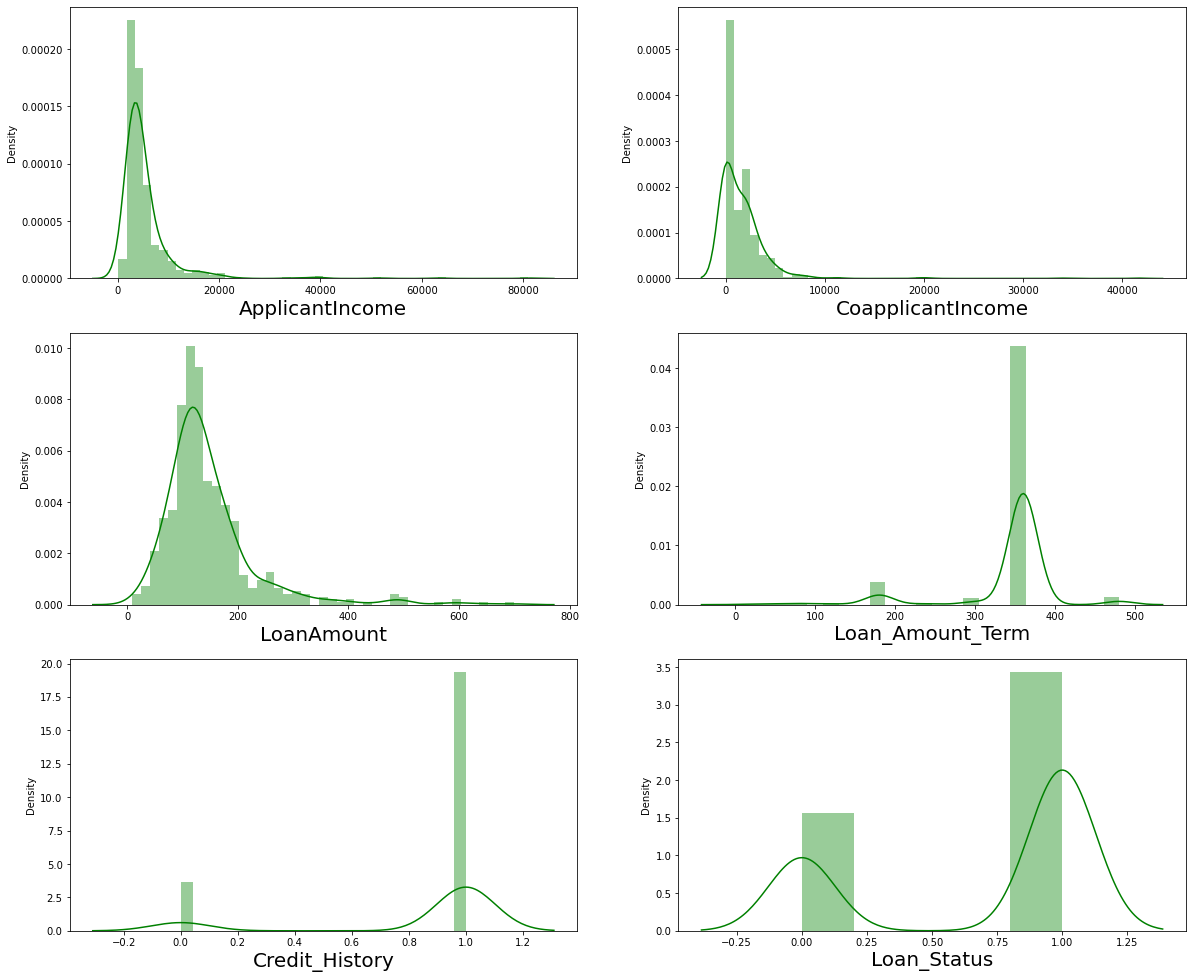

In [14]:
#Relationship Visualizing

plt.figure(figsize = (20,35), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 15: # as we see there are eight columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sn.distplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As shown in distplot almost every input variable is having skewness in it ().
Data columns are not normally distributed. So, we need remove skewness from all the input variable.

Quality is a targate variable and it is having two classes. so, it is a binaryclassification problem.

### Analysis through boxplot

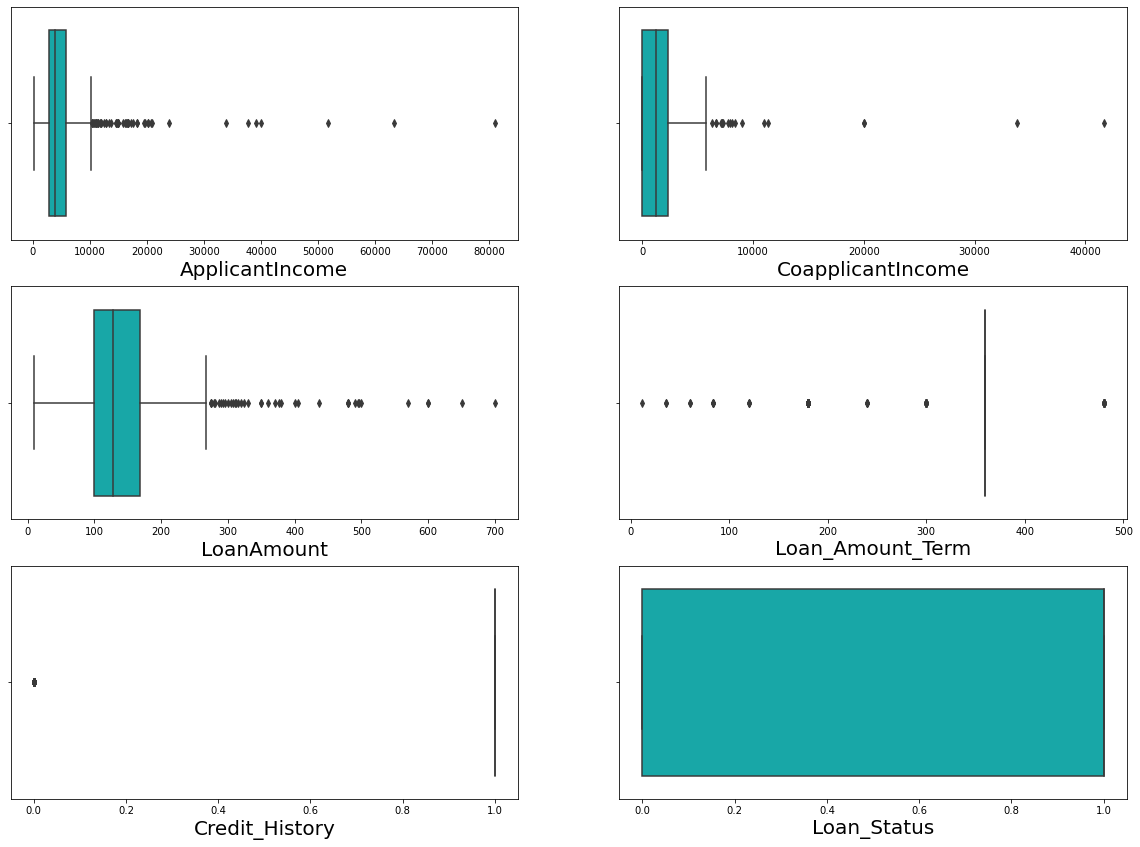

In [15]:
#Relationship Visualizing

plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 15: # as we see there are therteen columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sn.boxplot(fe[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As we can see all columns are having outliers in it, so we need to treat tham too.

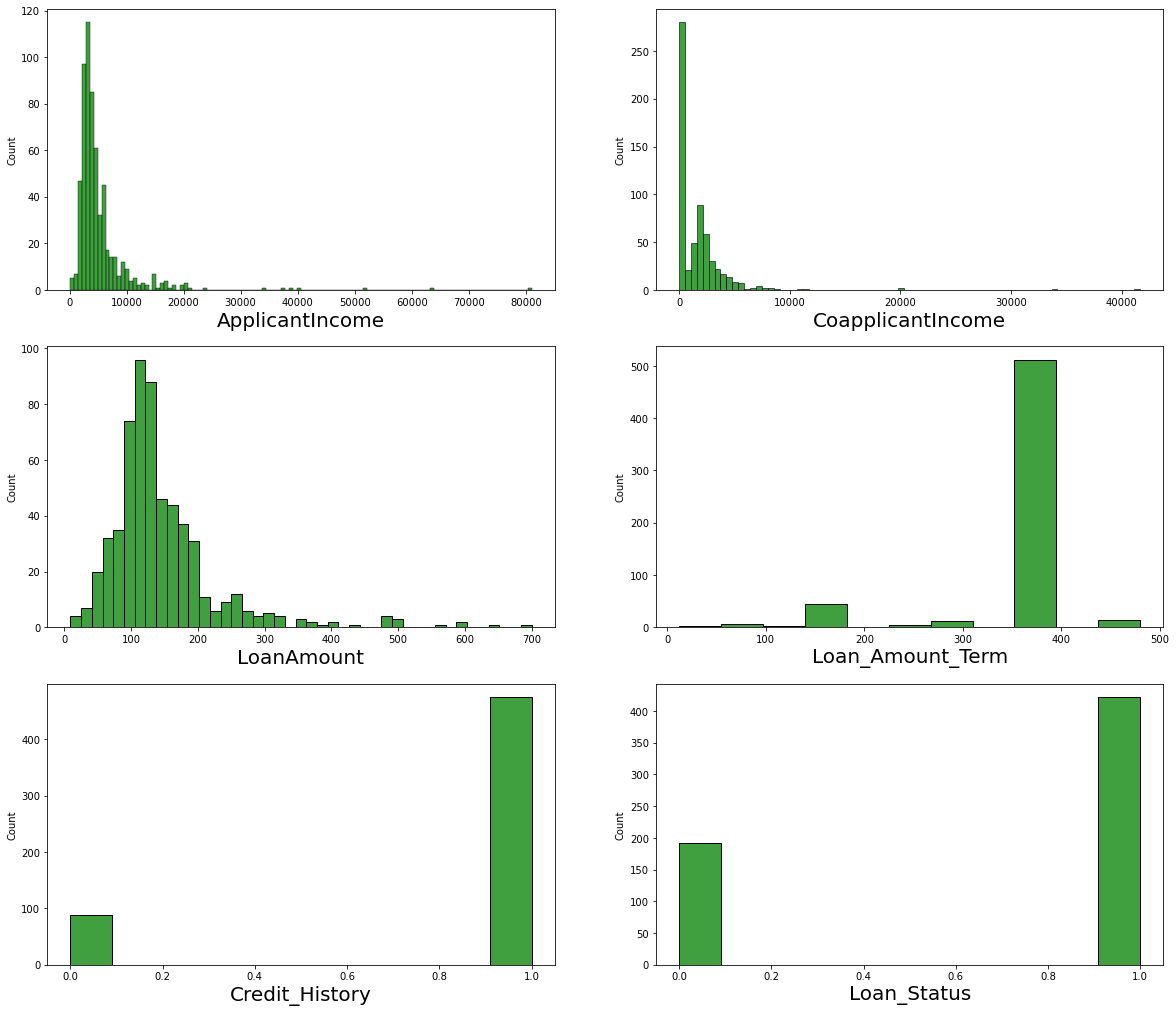

In [16]:
#Relationship Visualizing

plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 10: # as we see there are thirtheen columns in the data
        ax = plt.subplot(5,2,plotnumber)
        sn.histplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As shown in histplot almost every input variable is having skewness in it ().
Data columns are not normally distributed. So, we need remove skewness from all the input variable.

## Bi variate analysis
Bi variate analysis is works with two variables.

In [17]:
feature = data[["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Loan_Status"]]

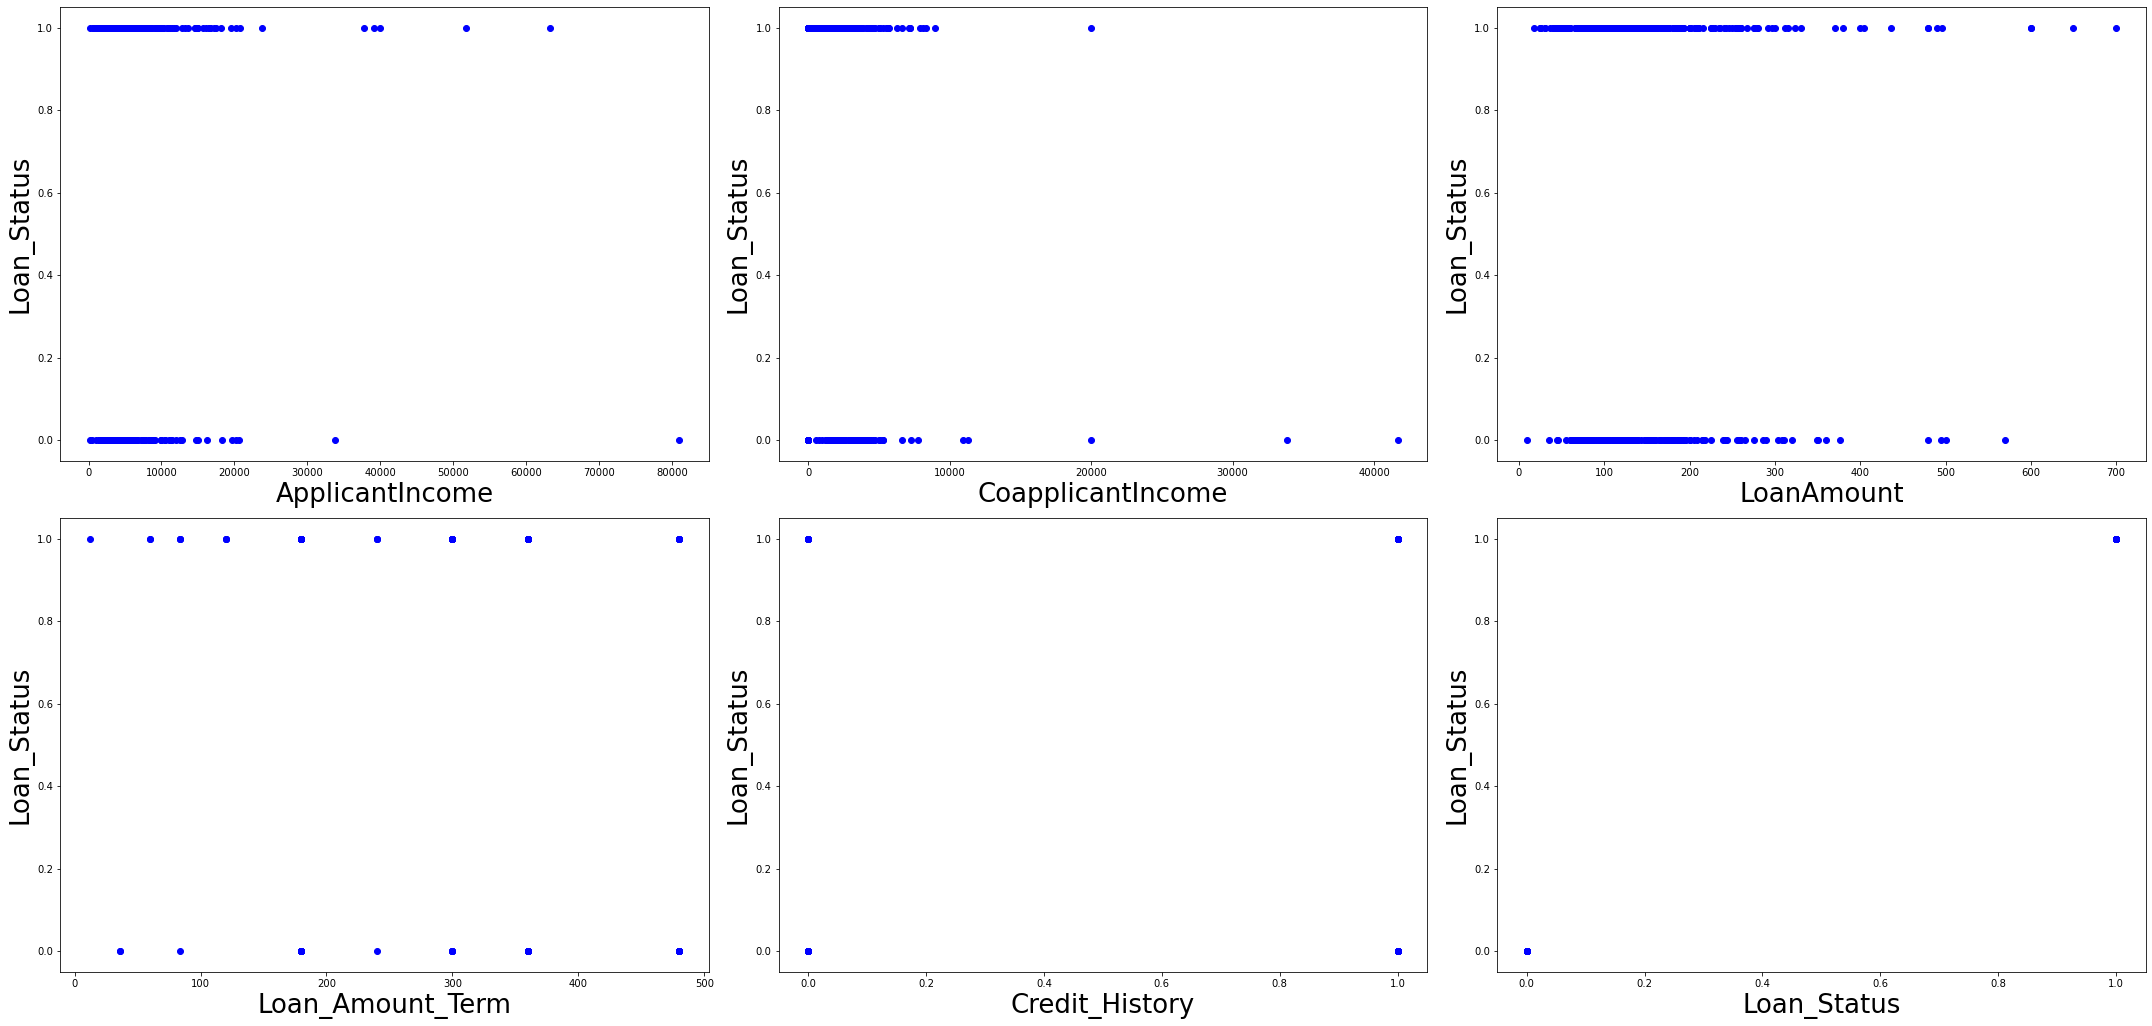

In [18]:
#Relationship Visualizing

plt.figure(figsize = (30,35), facecolor = 'white')
plotnumber = 1

for column in feature:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(feature[column],feature['Loan_Status'], color='b')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('Loan_Status', fontsize=26)
    plotnumber += 1
plt.tight_layout()

As we have seen in the plot some outliers are also present in it.

## Multi Variate analysis
Multi variate analysis find the relationship with all variables.
Now we will visualize the data and check the coiefficient of multicollinearity

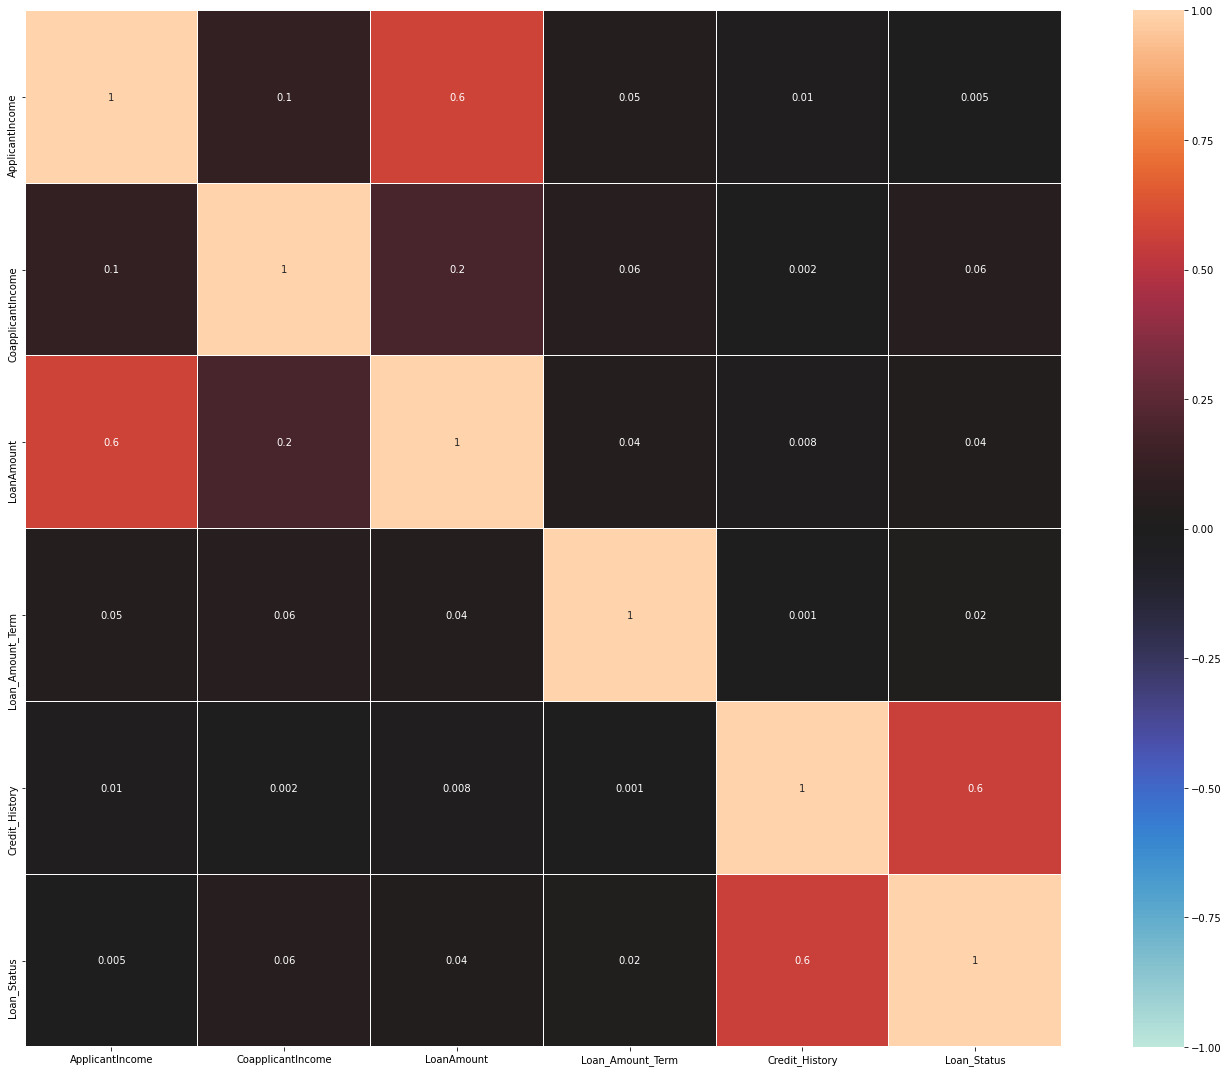

In [19]:
data_cor = data.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(data_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

As shown in plot 'Loan_Status' and 'ApplicantIncome' are poorly correlated.
and target variable strongly correlated with Credit_History.

##### Find out which columns are positively and negatively correlated with each other

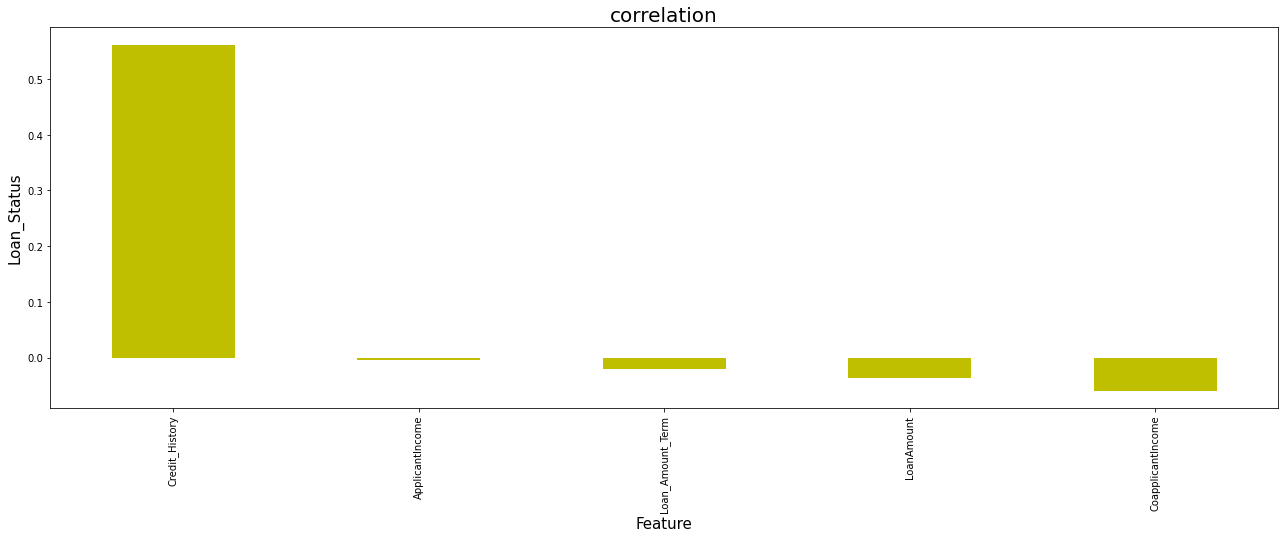

In [20]:
plt.figure(figsize=(22,7))
data.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Loan_Status', fontsize = 15)
plt.title('correlation', fontsize = 20)
plt.show()

as we have saw in the plot ApplicantIncome and target variable is having very less correlation with each other. 

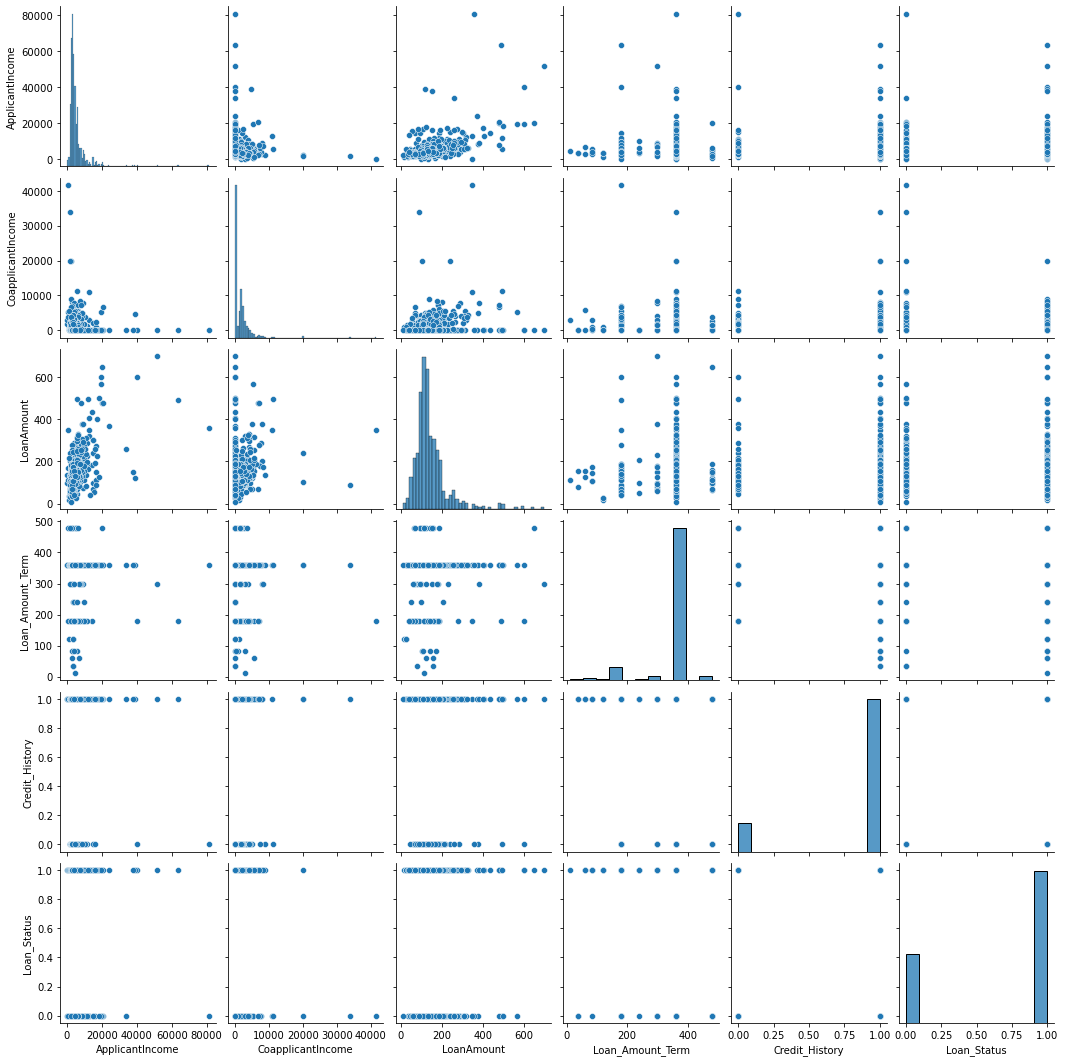

In [21]:
sn.pairplot(data)
plt.show()

In above pairplot we can see each and every coloumn relationship with each other.

#### After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed futher for next steps:

## Handling missing values

In [22]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### 1.Gender

In [23]:
# Check unique values of Gender column
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

It is a categorical column so fill null values with mode.

In [24]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])

#### 2. Married Column

In [25]:
# Check unique values of Married column
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [26]:
data['Married']=data['Married'].fillna(data['Married'].mode()[0])

#### 3. Dependents Column

In [27]:
# Check unique values of Dependents column
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [28]:
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])

#### 4. Self_Employed column

In [29]:
# Check unique values of Self_Employed column
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [30]:
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

#### 5. LoanAmount column

In [31]:
# Check unique values of Self_Employed column
data['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

It is a Contineous column so fill null values with mean/median.

In [32]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())

#### 6. Loan_Amount_Term column

In [33]:
# Check unique values of Self_Employed column
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [34]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

#### 7.Credit_History column 

In [35]:
# Check unique values of Self_Employed column
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [36]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

## after filling missing values with mean mode value check the null values of column

In [37]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

we can see there are no missing values.

## Encoding/Droping 

In [38]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


#### 1. Drop Loan_ID column

In [39]:
# Check unique values of Loan_ID column
data['Loan_ID'].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [40]:
data['Loan_ID'].value_counts()

LP001253    1
LP002229    1
LP001387    1
LP002529    1
LP001379    1
           ..
LP002387    1
LP001546    1
LP001066    1
LP002961    1
LP002519    1
Name: Loan_ID, Length: 614, dtype: int64

as we can see in loan id columns all values are having unique count, so we can drop that column.

In [41]:
#drop Loan_ID column
data=data.drop(['Loan_ID'], axis=1)

#### 2.Gender

In [42]:
# Check unique values of Loan_ID column
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [43]:
data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

## Encode all object datatypes column with label encoder

In [44]:
#import label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=le.fit_transform(data[i].values.reshape(-1,1))

In [46]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


## Visualization of all input variables correlation with targate variable

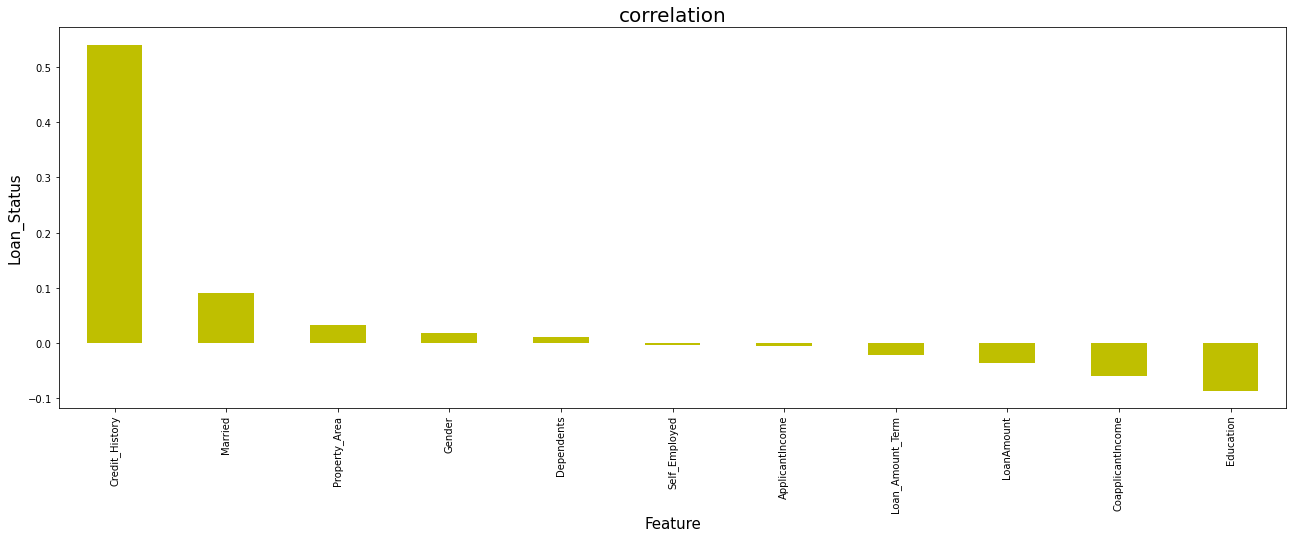

In [47]:
plt.figure(figsize=(22,7))
data.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Loan_Status', fontsize = 15)
plt.title('correlation', fontsize = 20)
plt.show()

In [48]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


# Remove outliers 
Now we found the outliers and skewness in some variables.Removing outliers first.

## 1.Outlier removal using Zscore

In [49]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(data[['CoapplicantIncome','LoanAmount','Loan_Amount_Term']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

new_data = data[filtering_entry]

print("shape before and after")
print("shape before".ljust(20),":", data.shape)
print("shape after".ljust(20),":", new_data.shape)
print("Percentage Loss".ljust(20),":", (data.shape[0]-new_data.shape[0])/data.shape[0])

shape before and after
shape before         : (614, 12)
shape after          : (582, 12)
Percentage Loss      : 0.05211726384364821


5.211% data loss after using Zscore technique

In [50]:
582/614*100

94.78827361563518

94.788% data remains.

In [51]:
new_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,0.816151,0.651203,0.726804,0.225086,0.127148,4996.235395,1416.762749,137.048226,347.711340,0.850515,1.027491,0.689003
std,0.387694,0.477000,1.000483,0.417998,0.333425,4965.949197,1654.414403,57.770163,51.608341,0.356872,0.788864,0.463300
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,180.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2843.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3756.000000,1250.000000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5674.500000,2252.250000,160.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,8980.000000,380.000000,480.000000,1.000000,2.000000,1.000000


## 2. Outlier Removing using IQR

### from boxplot in EDA, we came to know that outliers present in following columns.

#### Visualize data again to check outliers are present at low side or high side 

In [52]:
data2 = data

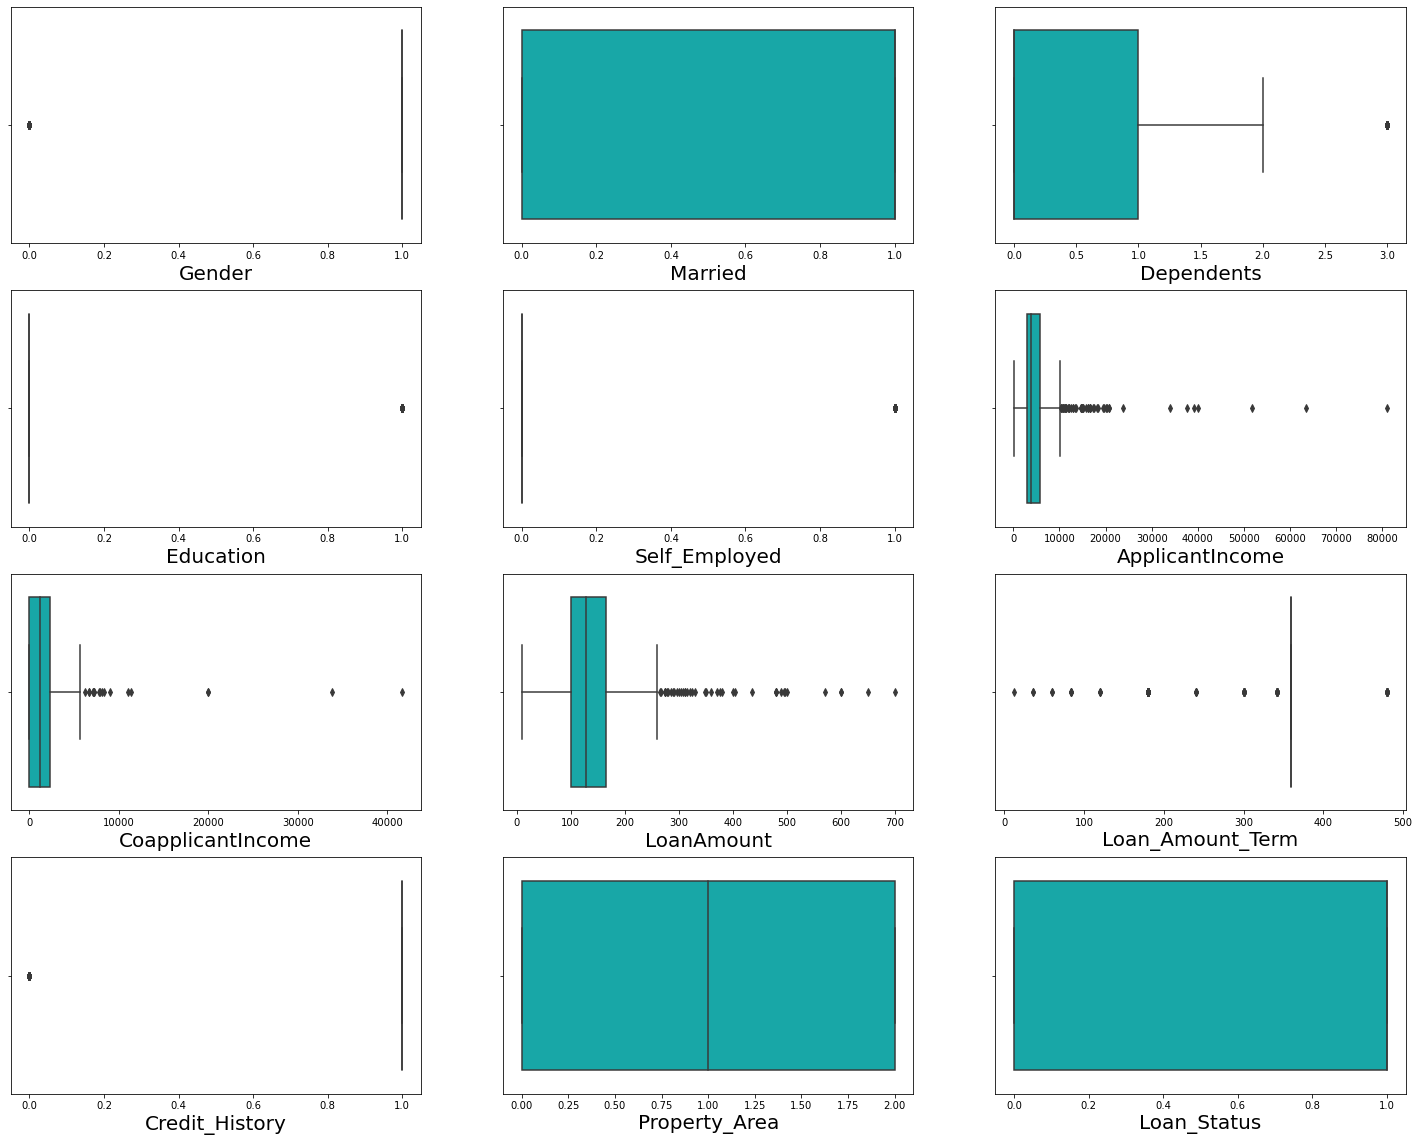

In [53]:
plt.figure(figsize=(25,20))
graph = 1

for column in data2:
    if graph <= 15:
        ax = plt.subplot(4,3, graph)
        sn.boxplot(data[column], color = 'c')
        plt.xlabel(column, fontsize = 20)
        
    graph+=1
plt.show()

#### check wheather the variables are contineous in nature as well as they are having outliers in it, after that remove that outliers of contineous data. 

#### contioeous data columns are ----> 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'
all above contineous data is having outliers in it.

In [54]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = data2.quantile(0.25)

#3rd quantile 75%
q3 = data2.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [55]:
data2.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


## Outlier detection formula 

#### Higher side ==> Q3 + (1.5 * IQR)
#### Lower side ==> Q1 - (1.5 * IQR) 

##### Outliers removal from higher side 

In [56]:
#as shown in boxplot we have outlier in higher side of CoapplicantIncome 
#Remove outliers from higher side so, use higher side formula

CoapplicantIncome_out = (q3.CoapplicantIncome + (1.5*(iqr.CoapplicantIncome)))
CoapplicantIncome_out

5743.125

In [57]:
index_out = np.where(data2['CoapplicantIncome'] > CoapplicantIncome_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
592,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
593,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
594,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


after removing outliers from CoapplicantIncome 596 rows will remains in dataframe.

In [58]:
#as shown in boxplot we have outlier in higher side of LoanAmount 
#Remove outliers from higher side so, use higher side formula

LoanAmount_out = (q3.LoanAmount + (1.5*(iqr.LoanAmount)))
LoanAmount_out

261.5

In [59]:
index_out = np.where(data2['LoanAmount'] > LoanAmount_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
559,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
560,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
561,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


after removing outliers from LoanAmount 563 rows will remains in dataframe.

In [60]:
#as shown in boxplot we have outlier in higher side of Loan_Amount_Term 
#Remove outliers from higher side so, use higher side formula

Loan_Amount_Term_out = (q3.Loan_Amount_Term + (1.5*(iqr.Loan_Amount_Term)))
Loan_Amount_Term_out

360.0

In [61]:
index_out = np.where(data2['Loan_Amount_Term'] > Loan_Amount_Term_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
545,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
546,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
547,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


after removing outliers from Loan_Amount_Term 549 rows will remains in dataframe.

In [62]:
#Check the Outliers for Loan_Amount_Term
#Remove outliers from lower side so, use lower side formula

Loan_Amount_Term_out = (q1.Loan_Amount_Term - (1.5*(iqr.Loan_Amount_Term)))
Loan_Amount_Term_out

360.0

In [63]:
index_out = np.where(data2['Loan_Amount_Term'] < Loan_Amount_Term_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,608,1,1,0,0,0,3232,1950.0,108.000000,360.0,1.0,0,1
466,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
467,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
468,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


after removing outliers from Loan_Amount_Term 470 rows will remains in dataframe. 

#### After removing outliers using IQR technique there are 470 rows will remains in dataset.
Now, find how much data loss in IQR method

In [64]:
((614-470)/614) * 100

23.452768729641694

25.32% data loss in IQR method

In [65]:
(470/614)*100

76.54723127035831

76.54% data remains after removing outliers using IQR technique

### After applying Zscore and IQR technique to remove outliers. We conclude that less amount data will loss in Zscore technique so we will go with Zscore technique 

In [66]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


## Check the skewness and remove that

In [67]:
new_data.skew()

Gender              -1.636555
Married             -0.636160
Dependents           1.044261
Education            1.319920
Self_Employed        2.244210
ApplicantIncome      8.062627
CoapplicantIncome    1.348959
LoanAmount           1.195901
Loan_Amount_Term    -2.090517
Credit_History      -1.971149
Property_Area       -0.048661
Loan_Status         -0.818715
dtype: float64

As we see there are some variables are skewed, whoes value is not lies between -0.5 to +0.5 this range as well as they are contineous in nature.

1. CoapplicantIncome 
2. LoanAmount
3. Loan_Amount_Term                 

### Check outliers datatype. If data types of skewed column is catogorical than no need to remove skewness from that variable.

## Apply yeo-johnson transformation to remove skewness

In log transformation, we will take the log of Continues skewed data and convert that into normal data(distribution)/less skewed data and in power transformation we will take the mean value in place of 0th value.

In [68]:
#applying log transformation on skewed columns
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

new_data['CoapplicantIncome'] = scaler.fit_transform(new_data['CoapplicantIncome'].values.reshape(-1,1))
new_data['LoanAmount'] = scaler.fit_transform(new_data['LoanAmount'].values.reshape(-1,1))
new_data['Loan_Amount_Term'] = scaler.fit_transform(new_data['Loan_Amount_Term'].values.reshape(-1,1))

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

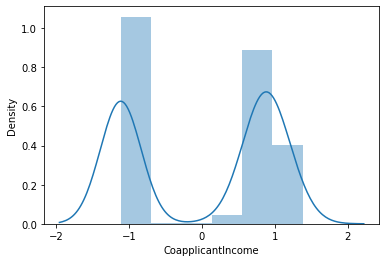

In [69]:
sn.distplot(new_data['CoapplicantIncome'])

In [70]:
new_data.skew()

Gender              -1.636555
Married             -0.636160
Dependents           1.044261
Education            1.319920
Self_Employed        2.244210
ApplicantIncome      8.062627
CoapplicantIncome   -0.181155
LoanAmount           0.047554
Loan_Amount_Term     0.727593
Credit_History      -1.971149
Property_Area       -0.048661
Loan_Status         -0.818715
dtype: float64

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

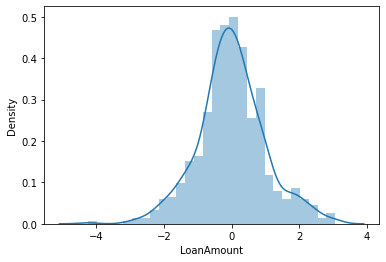

In [71]:
sn.distplot(new_data['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

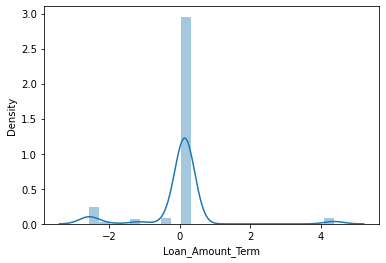

In [72]:
sn.distplot(new_data['Loan_Amount_Term'])

##### As shown in plot skewness removes after using yeo-johnson transformation skewness removal technique.

## Seperating the columns into featuers and target:

#### X= features, y=Target 

In [73]:
x = new_data.drop(columns = 'Loan_Status', axis=1)
y = new_data['Loan_Status']

## Sampling

In [74]:
y.value_counts()

1    401
0    181
Name: Loan_Status, dtype: int64

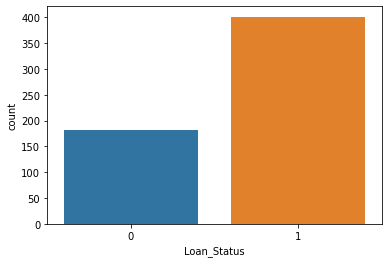

In [75]:
#visualization of target variable 
sn.countplot(new_data["Loan_Status"])
plt.show()

As we can see there is class imbalance in target varibale, so we need to balance that with sampling otherwise the model will get bias.

### Oversampling

In [76]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x, y)

In [77]:
y.value_counts()

1    401
0    401
Name: Loan_Status, dtype: int64

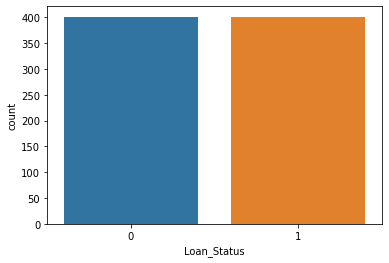

In [78]:
#visualization of target variable 
sn.countplot(y)
plt.show()

## Scalling technique

In [79]:
#import Libraries
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scaled = ss.fit_transform(x)

variables are scaled now using standard scaler technique.

## Variance inflation factor

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.238492,Gender
1,1.402138,Married
2,1.175739,Dependents
3,1.052119,Education
4,1.031093,Self_Employed
5,1.378216,ApplicantIncome
6,1.341504,CoapplicantIncome
7,1.398908,LoanAmount
8,1.022904,Loan_Amount_Term
9,1.031676,Credit_History


as we have saw in the table vif value is not greater than 5, so we can proceed further.

## Finding best random state 

In [1771]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [1772]:
from sklearn.tree import DecisionTreeClassifier
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=i)
    mod= DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.8298755186721992 on Random_state  165


In [1794]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.25, random_state = 165)

## 1.Logistic Regression Model

In [1795]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Log_reg =LogisticRegression()
Log_reg.fit(x_train, y_train)

LogisticRegression()

In [1796]:
pred_test=Log_reg.predict(x_test)

In [1797]:
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7512437810945274
[[71 31]
 [19 80]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       102
           1       0.72      0.81      0.76        99

    accuracy                           0.75       201
   macro avg       0.75      0.75      0.75       201
weighted avg       0.76      0.75      0.75       201



In [1798]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Log_reg, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7432453416149069

###### The Accuracy score for logistic regression model is : 75.12%
###### Cross validation score for logistic regression is : 74.32%

## 2.Random forest Classifier

In [1809]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters ={'criterion':['gini', 'entropy'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestClassifier()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt'}


In [1810]:
Rfr =RandomForestClassifier(criterion = "gini", max_features="sqrt")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = accuracy_score(y_test,pred_decision)
print('accuracy score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

accuracy score:  84.07960199004975
Cross Val Score:  80.05897478897649


###### The Accuracy score for Random Forest Classifier model is : 84.07%
###### Cross validation score for Random Forest Classifier is : 80.05%

## 3.Decision Tree Classifier

In [1801]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [1802]:
pred_DT = DT.predict(x_test)
print(accuracy_score(y_test,pred_DT))

0.8059701492537313


In [1803]:
print(confusion_matrix(y_test,pred_DT))
print(classification_report(y_test,pred_DT))

[[88 14]
 [25 74]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       102
           1       0.84      0.75      0.79        99

    accuracy                           0.81       201
   macro avg       0.81      0.81      0.81       201
weighted avg       0.81      0.81      0.81       201



In [1804]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(DT, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7595108695652174

###### The Accuracy score for Decision tree Classifier model is : 80.59%
###### Cross validation score for Decision tree Classifier is : 75.95%

## 4.Support vector Classifier

In [1811]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [1812]:
pred_sv = sv.predict(x_test)
print(accuracy_score(y_test,pred_sv))

0.7064676616915423


In [1813]:
print(confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

[[68 34]
 [25 74]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       102
           1       0.69      0.75      0.71        99

    accuracy                           0.71       201
   macro avg       0.71      0.71      0.71       201
weighted avg       0.71      0.71      0.71       201



In [1814]:
cv_score= cross_val_score(sv, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.48624999999999996

###### The Accuracy score for SVC model is : 70.64%
###### Cross validation score for SVC is : 48.62%

## Comparison of all model

#### The difference between Cross validation score  and logistic regression model is: 0.8%
#### The difference between Cross validation score  and Random Forest Classifier model is: 4.02%
#### The difference between Cross validation score  and Decision tree Classifier  model is: 4.64%
#### The difference between Cross validation score  and SVC model is: 22.02%

### as shown in above Logistic degression is having minimum difference, so Logistic Regression is best model

## Hyper parameter tunning

In [1820]:
#Logistic Regression

Parameters = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'C' : [1, 10, 0.1]}

In [1821]:
GCV=GridSearchCV(LogisticRegression(),Parameters,cv=5)

In [1822]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 0.1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [1823]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [1824]:
mod = LogisticRegression( C=0.1, penalty='l1', solver='liblinear')

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(accuracy_score(y_test, pred)*100)

75.62189054726367


after hyper parameter tunning accuracy score is: 75.62%

## Boosting of model with adaboost

In [1825]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [1826]:
ada.fit(x_train, y_train)
y_pred = ada.predict(x_train)

In [1827]:
from sklearn import metrics
print('accuracy square score', metrics.accuracy_score(y_train, y_pred))

accuracy square score 0.8569051580698835


after boosting of model the model accuracy raise to : 85.69%

## ROC AUC curve to choose best model

In [1828]:
# plot ROC/AUC for multiple models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [1829]:
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sv = SVC()

In [1830]:
#train all classifiers
lr.fit(x_train, y_train)
rf.fit(x_train, y_train)
dt.fit(x_train, y_train)
sv.fit(x_train, y_train)

print("Now all models are trained")

Now all models are trained


In [1831]:
#All model score captured

lr.score(x_train, y_train)
rf.score(x_train, y_train)
dt.score(x_train, y_train)
sv.score(x_train, y_train)

print("all model test score captured")

all model test score captured


## find ROC AUC Score

In [1832]:
#logistic Regression
roc_auc_score(y_test, lr.predict(x_test))

0.7520796197266785

In [1833]:
# Random Forest Classifier
roc_auc_score(y_test, rf.predict(x_test))

0.8214497920380273

In [1834]:
#Decision Tree Classifier
roc_auc_score(y_test, dt.predict(x_test))

0.8002079619726679

In [1835]:
#SVC
roc_auc_score(y_test, sv.predict(x_test))

0.7070707070707071

## Ploting AUC ROC curve

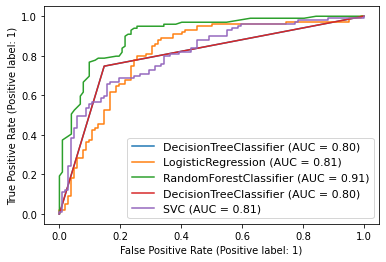

In [1836]:
disp = plot_roc_curve(dt, x_test, y_test)

plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)

plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)

plot_roc_curve(dt, x_test, y_test, ax=disp.ax_)

plot_roc_curve(sv, x_test, y_test, ax=disp.ax_)

plt.legend(prop = {'size':11}, loc='lower right')

plt.show()

## Saving the model 

In [1837]:
import joblib
joblib.dump(mod,"Loanprediction.pkl")

['Loanprediction.pkl']

## Loding model

In [1838]:
model = joblib.load("Loanprediction.pkl")

In [1839]:
prediction = model.predict(x_test)

In [1840]:
prediction=pd.DataFrame(prediction)
#converted into data frame

In [1841]:
prediction.to_csv('LoanpredictionResults.csv', index = False)
#prediction saving

model saved